In [19]:
import os, sys
import pickle
import csv
import numpy as np
import matplotlib.pyplot as plt
import cv2
from mpl_toolkits.axes_grid1 import ImageGrid
import tensorflow as tf

Data preparation

In [2]:
#as some images contain many proteins at the same time, we add that image to all the featured proteins respective list

In [44]:
def load_images(startIndex, stopIndex):
    path = "train/"
    with open("train.csv") as labels_file:
        csv_reader = csv.reader(labels_file)
        index = 0
        for line in csv_reader:
            if index >= startIndex and index < stopIndex:
                name = line[0]
                if (name+"_blue.png") in os.listdir(path):
                    #we take a look at the proteins present in the image
                    present_proteins = line[1].split()
                    #if there are many we don't deal with it (for now)
                    if len(present_proteins) == 1:
                        #reading and resizing
                        colored_image = np.zeros((256,256,3))
                        blue = cv2.resize(cv2.imread(path+name+"_blue.png", cv2.IMREAD_GRAYSCALE), (256, 256))
                        green = cv2.resize(cv2.imread(path+name+"_green.png", cv2.IMREAD_GRAYSCALE), (256, 256))
                        red = cv2.resize(cv2.imread(path+name+"_red.png", cv2.IMREAD_GRAYSCALE), (256, 256))
                        
                        #putting all the filtered images into one
                        colored_image[:,:,0] = red
                        colored_image[:,:,1] = green
                        colored_image[:,:,2] = blue
                        
                        proteins[present_proteins[0]].append(colored_image)
                        
            if index >= stopIndex:
                break
            index += 1

In [45]:
def create_splits(data, ratio):
    train_size = int(round(len(data) * ratio, 0))
    test_size = int(round(len(data)*(1-ratio), 0))
    
    train = data[:train_size]
    test = data[train_size:]
    
    assert len(train) == train_size
    assert len(test) == test_size
    
    return train, test

In [46]:
def displaySample(proteins):
    fig = plt.figure(1, figsize=(17, 17))
    grid = ImageGrid(fig, 111, nrows_ncols=(1, 4), axes_pad=0.2)

    grid[0].imshow(proteins["0"][0], interpolation="bilinear")
    grid[0].tick_params(axis='both', which='both', bottom='off', top='off', 
                    labelbottom='off', right='off', left='off', labelleft='off')

    grid[1].imshow(proteins["1"][0], interpolation="bilinear")
    grid[1].tick_params(axis='both', which='both', bottom='off', top='off', 
                    labelbottom='off', right='off', left='off', labelleft='off')

    grid[2].imshow(proteins["2"][0], interpolation="bilinear")
    grid[2].tick_params(axis='both', which='both', bottom='off', top='off', 
                    labelbottom='off', right='off', left='off', labelleft='off')

    grid[3].imshow(proteins["3"][0], interpolation="bilinear")
    grid[3].tick_params(axis='both', which='both', bottom='off', top='off', 
                    labelbottom='off', right='off', left='off', labelleft='off')

train_proteins = {}
test_proteins = {}

for kind in proteins.keys():
    train_proteins[kind], test_proteins[kind] = create_splits(proteins[kind], 0.8)

Let's pickle our results so we don't have to run everything over and over again

In [47]:
for i in range(4):
    proteins = {
    "0":[],"1":[],"2":[], "3":[],"4":[],
    "5":[],"6":[],"7":[], "8":[],"9":[],
    "10":[],"11":[],"12":[], "13":[],"14":[],
    "15":[],"16":[],"17":[], "18":[],"19":[],
    "20":[],"21":[],"22":[], "23":[],"24":[],
    "25":[],"26":[],"27":[]}
    
    load_images(i*1000,(i+1)*1000)
    
    with open("pickles/train"+str(i)+".pickle", "wb") as file:
        pickle.dump(proteins, file)
        
    print("Batch {} created successfully" .format(i))

Batch 0 created successfully
Batch 1 created successfully
Batch 2 created successfully
Batch 3 created successfully


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


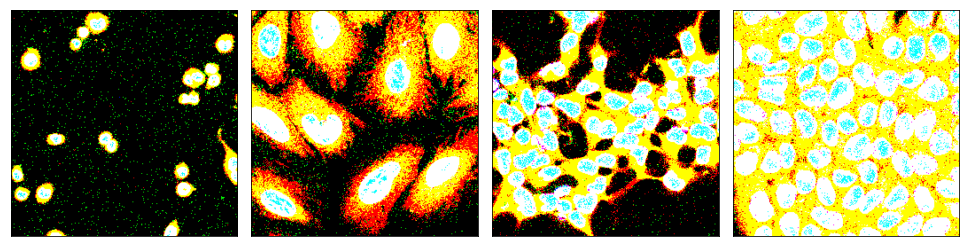

In [48]:
displaySample(proteins)